<a href="https://colab.research.google.com/github/trong-khanh-1109/CS231.M13.KHCL/blob/main/Shi_Tomasi_Corner_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Shi-Tomasi Corner Detector</h1>


<h2>Đỗ Trọng Khánh - 19521676</h2>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import figure

In [ ]:
img = cv2.imread('/gdrive/MyDrive/Colab Notebooks/Computer Vision/Week 3/chessboard_calibration.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Reference: [itzone.com.vn](https://itzone.com.vn/vi/article/corner-detection-voi-opencv/)

cv2.goodFeaturesToTrack(img,maxCorners,qualityLevel,minDistance)
- img: ảnh xám để thuận tiện trong việc xử lý.
- maxCorners: Số góc mong muốn tìm thấy. Nếu số góc tìm được lớn hơn số mong muốn thì sẽ trả về số góc mong muốn nhưng có confidence cao nhất.
- qualityLevel:  tham số này nhân với điểm confidence lớn nhất của một góc tìm được tạo ra mỗi giá trị ngưỡng. Và dựa trên ngưỡng này để loại giá trị góc có điểm confidence bé hơn ngưỡng. Nếu số góc tìm được bé hơn góc mong muốn thì chỉ trả về số góc tìm được
- minDistance: khoảng cách Euclid bé nhất giữa hai góc.

In [ ]:
corners = cv2.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),4,255,-1)

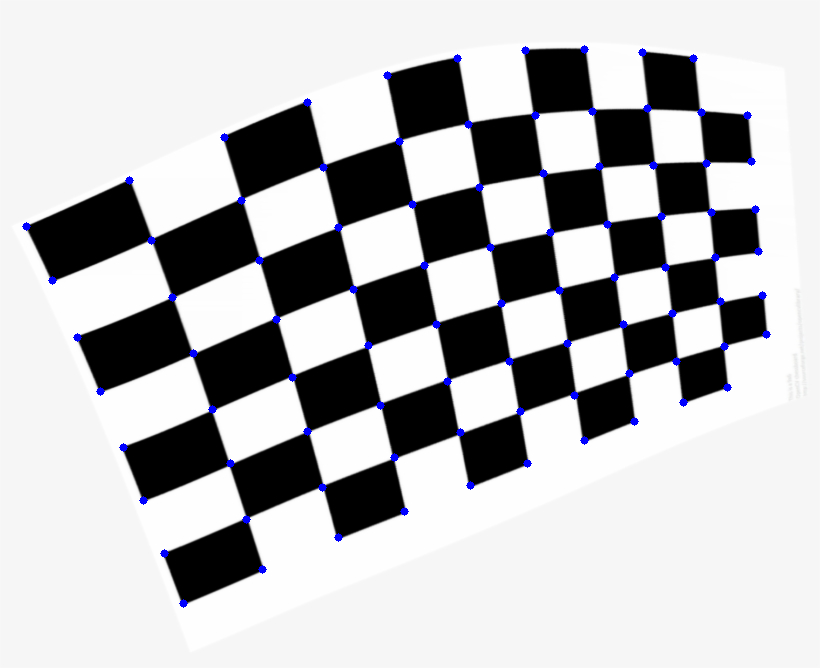

In [ ]:
cv2_imshow(img)

#Nhận xét

In [ ]:
img_carris_corner = cv2.imread('/gdrive/MyDrive/Colab Notebooks/Computer Vision/Week 3/Img_Harris.png');

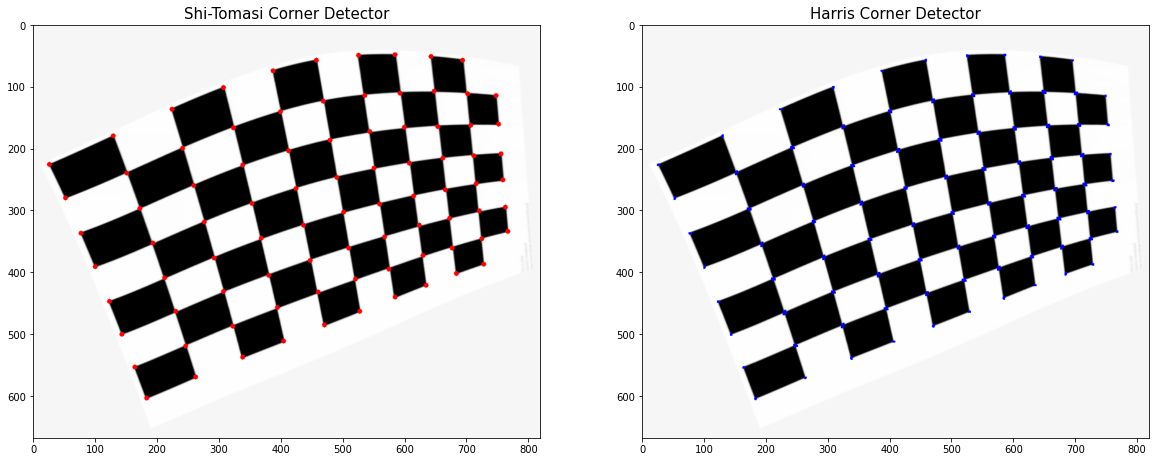

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20, 30));
ax1.imshow(img);
ax1.set_title('Shi-Tomasi Corner Detector', size='15');
ax2.imshow(img_carris_corner);
ax2.set_title('Harris Corner Detector', size='15');

- **Shi-Tomasi Corner Detection** khác với **Harris Corner Detection** tại hàm tính **cofidence score** $\Rightarrow$ đây là điểm giúp cho thuật toán này có thể phát hiện vùng có khả năng là góc nhiều hơn Harris.
- **Shi-Tomasi Corner Detection** chỉ cần $\lambda_{1}$ và $\lambda_{2}$ đồng thời lớn hơn ngưỡng LambdaMin thì góc đó đã được xem là vùng chứa góc:
    + Shi-Tomasi Corner: R = min($\lambda_{1}$, $\lambda_{2}$)
    + Harris Corner: *R = $\lambda_{1}$.$\lambda_{2}$ - k($\lambda_{1}$ + $\lambda_{2}$)$^2$*
- Ngoài ra trong **OpenCV** có cung cấp một hàm **cv2.goodFeaturesToTrack(gray, maxCornerNB, qualityLevel, minDistance)** có thể thực hiện thuật toán này dễ dàng hơn. Trong hàm này có chứa 1 tham số maxCorners: Số góc mong muốn tìm thấy. Nó giúp ta có thể tăng hoặc giảm số góc mình mong muốn.